# Class Notebooks

* [HAPI_00.ipynb](HAPI_00.ipynb) - Introduction
* [HAPI_01.ipynb](HAPI_01.ipynb) - Basics
* [HAPI_02.ipynb](HAPI_02.ipynb) - Data structures
* **[HAPI_03.ipynb](HAPI_03.ipynb) - Plotting (this Notebook)**
* [HAPI_04.ipynb](HAPI_04.ipynb) - Problems

# Overview

* The package `hapiplot` can be used to plot of data returned by the `hapi` function. It was developed primarily for testing the output of HAPI servers and the `hapi` function.

* In this section, we show some of the basic features of `hapiplot` and also demonstrate the use of other plotting libraries.

# Setup

In [1]:
# Show Matplotlib plots in page instead of opening a window
%matplotlib inline 
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg'] 

# Misc. configuration
import warnings
# See https://github.com/boto/boto3/issues/454 for an explanation.
warnings.simplefilter("ignore", ResourceWarning) # removes spurious Notebook warns
warnings.simplefilter("ignore", DeprecationWarning) # removes spurious Notebook warns
warnings.simplefilter("ignore", UserWarning) # removes spurious Notebook warns
warnings.filterwarnings(action="ignore", message="unclosed", category=ResourceWarning)

# `hapiplot` - Basic

[`hapiplot()`](https://github.com/hapi-server/client-python/tree/master/hapiclient/) computes plot labels from  `meta` and passes `meta` and `data` to the functions `timeseries.py` and `heatmap.py`, which use Matplotlib to create a basic plot.

There are two ways to create a plot using `hapiplot()`
1. Using the return values of the `hapi()` function

    ```Python
    data, meta = hapi(server, dataset, parameters, start, stop)
    meta = hapiplot(data, meta)
    ```


2. By bypassing the call to `hapi()` and using only

    ```Python
    data, meta = hapiplot(server, dataset, parameters, start, stop)
    ```

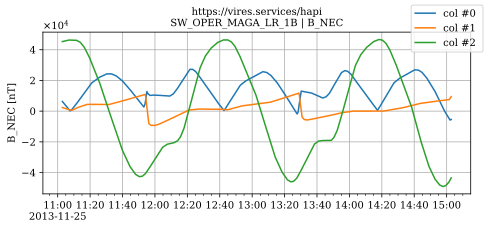

In [2]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'https://vires.services/hapi'
dataset    = 'SW_OPER_MAGA_LR_1B'
parameters = 'B_NEC'
start      = '2013-11-25T11:02:52Z'
stop       = '2013-11-25T15:02:52.000Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './cachedir'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Method 1.
hapiplot(data, meta);

if False:
    # Method 2.
    from hapiplot import hapiplot
    meta = hapiplot(server, dataset, parameters, start, stop)


## Modify Matplotlib style and labels

List all styles.

In [3]:
# See also
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
import matplotlib
rclib =  matplotlib.style.library
print('Style options available:')
for key in rclib:
    print(key)

Style options available:
Solarize_Light2
_classic_test_patch
_mpl-gallery-nogrid
_mpl-gallery
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark-palette
seaborn-v0_8-dark
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
seaborn-v0_8
tableau-colorblind10


### Timeseries

The metadata provided by the VirES HAPI server does not include labels for the components of the parameter `B_NEC`, so the defaults of `col #0`, etc. were used by `hapiplot()`. Here we modify the labels by setting them as options (`tsopts`) that are passed through to the back-end `timeseries` plotting function.

/srv/conda/envs/notebook/lib/python3.10/site-packages/hapiplot/plot/util.py:36: SyntaxWarning: style "seaborn-dark" is not in list of known styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']. Using style=fast
  warnings.warn('style "' + style + \


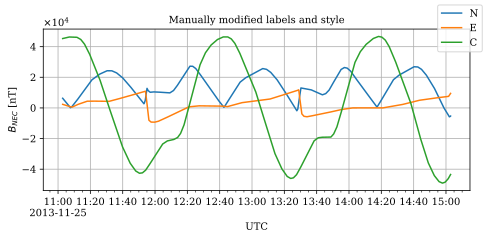

In [4]:
# Basic default options
popts = {
            'logging': False,
            'cachedir': './hapicache',
            'style': 'seaborn-dark',

            'title': 'Manually modified labels and style',
            'xlabel': 'UTC',
            'ylabel': '$B_{NEC}$ [nT]',
        
            'tsopts': {'legendlabels': ['N','E','C']}
}

hapiplot(data, meta, **popts);

### Heatmap (spectra)

In [5]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'http://datashop.elasticbeanstalk.com/hapi'
dataset    = 'CHEMS_PHA_BOX_FLUXES_FULL_TIME_RES'
parameters = 'HPlus_BEST_T1'
start      = '2004-07-01T04:00:00Z'
stop       = '2004-07-01T06:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

popts = {
            'logging': False,
            'logy': True,
            'ylabel': 'Energy [keV]',
            'logz': True,
            'title': 'y and z scales changed to log'
}
hapiplot(data, meta, **popts);

# `hapiplot` - Advanced


## Pass Matplotlib `rcParams` to `hapiplot`

List all rcParams

In [6]:
import matplotlib as mpl
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

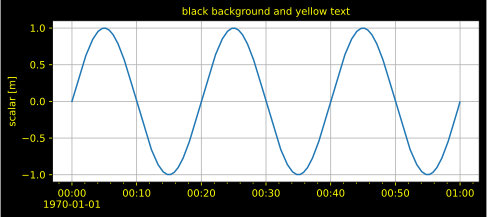

In [7]:
server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:59:59Z'
parameters = 'scalar'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

popts = {
            'usecache': True,
            'useimagecache': False,
            'logging': False,
            'saveimage': True,
            'returnimage': False,
            'title': 'black background and yellow text',
            'rcParams': {
                'savefig.transparent': False,
                'figure.facecolor': 'black',
                'savefig.facecolor': 'black',
                'font.family': 'DejaVu Sans',
                'text.color': 'yellow',
                'xtick.color': 'yellow',
                'ytick.color': 'yellow',
                'axes.labelcolor': 'yellow'
            }
         }

hapiplot(data, meta, **popts);

if False:
    # Open window with image
    import io
    from PIL import Image

    popts['returnimage'] = True
    # hapiplot adds the image data to meta if returnimage=True
    meta = hapiplot(data, meta, **popts)
    img = meta['parameters'][1]['hapiplot']['image']
    Image.open(io.BytesIO(img)).show()
    

## Modify figure after creation

See [`hapiplot` tests](https://github.com/hapi-server/plot-python/blob/main/test/test_hapiplot_visual.py#L122) for an example of modifying a figure after a call to `hapiplot` (this will not work in a notebook).


# Matplotlib

The standard package for plotting in Python is Matplotlib. The plotting features of this package are low-level, meaning that a significant amount of configuration is needed to create a presentable plot.

Text(0.5, 1.0, 'scalar with Time as datetimes')

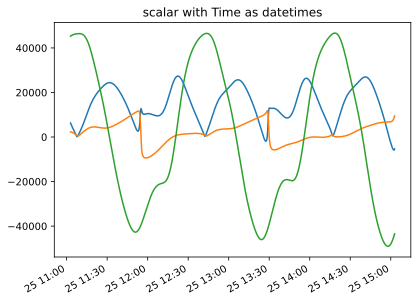

In [8]:
from hapiclient import hapi

server     = 'https://vires.services/hapi'
dataset    = 'SW_OPER_MAGA_LR_1B'
parameters = 'B_NEC'
start      = '2013-11-25T11:02:52Z'
stop       = '2013-11-25T15:02:52.000Z'
opts       = {'usecache': True, 'logging': False, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime

time_name = meta['parameters'][0]['name']
parameter1_name = meta['parameters'][1]['name']
# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data[time_name]),data[parameter1_name])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes')

<div style="background-color:yellow">
<h3>Problem 03a</h3>

<p>Use the metadata in <code>meta</code> and <a href="https://matplotlib.org/stable/api/matplotlib_configuration_api.html">Matplotlib</a> commands and modify the above code to<p>
    
<ol>
    <li>label the y-axis in the figure above with the name of the parameter and its units and</li>
    <li>add a legend with elements of N, E, and C.</li>
</h3>

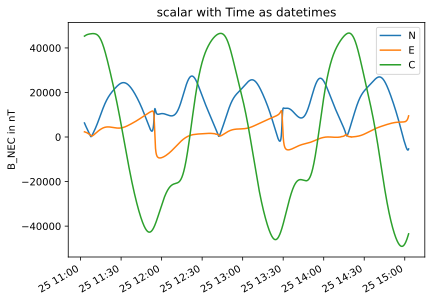

In [9]:
# Solution

from hapiclient import hapi

server     = 'https://vires.services/hapi'
dataset    = 'SW_OPER_MAGA_LR_1B'
parameters = 'B_NEC'
start      = '2013-11-25T11:02:52Z'
stop       = '2013-11-25T15:02:52.000Z'
opts       = {'usecache': True, 'logging': False, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime

time_name = meta['parameters'][0]['name']
parameter1_name = meta['parameters'][1]['name']
# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data[time_name]),data[parameter1_name])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes');
plt.ylabel(f"{meta['parameters'][1]['name']} in {meta['parameters'][1]['units']}")
plt.legend(["N", "E", "C"])

# Pandas

We can convert the HAPI `ndarray` to a Pandas DataFrame [as done in the previous notebook](HAPI_02.ipynb#Convert-to-Pandas-DataFrame) and then use the `plot` method of a DataFrame.

,N,E,C
Time,,,
1970-01-01 00:00:00+00:00,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01+00:00,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02+00:00,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03+00:00,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04+00:00,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05+00:00,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06+00:00,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07+00:00,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08+00:00,0.041876,-0.676876,-0.999123


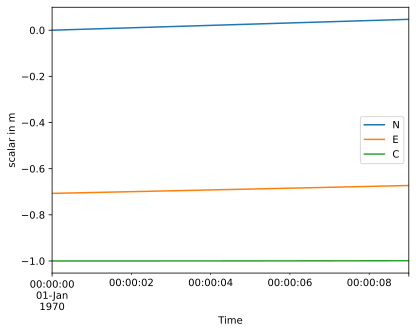

In [10]:
# Get data for use below
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

import pandas

# Create DataFrame
df = pandas.DataFrame(data['vector'])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data['Time'])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['N', 'E', 'C']

display(df)

%matplotlib inline
p = df.plot(ylabel=f"{meta['parameters'][1]['name']} in {meta['parameters'][1]['units']}");


<div style="background-color:yellow">
<h3>Problem 03b</h3>

<p>Use the metadata in <code>meta</code> and <a href="https://pandas.pydata.org/docs/user_guide/visualization.html">Pandas commands</a> to<p>
    
<ol>
    <li>label the y-axis in the figure above with the name of the parameter and its units and</li>
    <li>add a legend with elements of N, E, and C.</li>
</h3>

,x,y,z
Time,,,
1970-01-01 00:00:00+00:00,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01+00:00,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02+00:00,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03+00:00,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04+00:00,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05+00:00,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06+00:00,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07+00:00,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08+00:00,0.041876,-0.676876,-0.999123


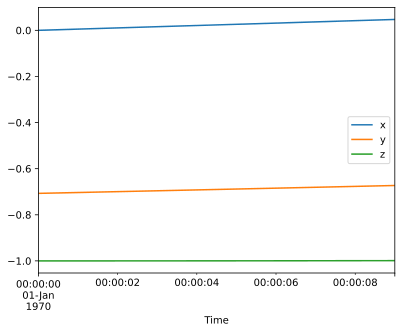

In [11]:
# Solution

from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

import pandas

# Create DataFrame
df = pandas.DataFrame(data['vector'])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data['Time'])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['x', 'y', 'z']

display(df)

%matplotlib inline
df.plot();

## PySPEDAS/PyTplot

[PySPEDAS and PyTplot](https://github.com/heliophysicsPy/summer-school/blob/main/pyspedas-tutorial/PySPEDAS_Summer_School_2022.ipynb) users can access and plot data from HAPI servers without needing to install either the `hapiclient` or `hapiplot` packages.

In the following, data from a HAPI server is obtained using the `pyhapi` function in the `pyspedas` package and plotted using the `tplot` function in the `pytplot` package.

PySpedas and PyTPlot will be covered [on Day 4 of the summer school](https://github.com/heliophysicsPy/summer-school/blob/main/pyspedas-tutorial/PySPEDAS_Summer_School_2022.ipynb).

In [12]:
%!pip install pyspedas

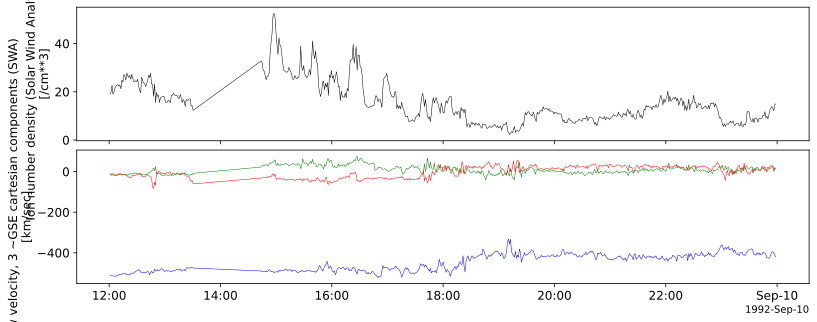

In [13]:
from pyspedas.hapi.hapi import hapi as pyhapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'GE_K0_CPI'
parameters = 'SW_P_Den,SW_V'
start      = '1992-09-09T12:00:40Z'
stop       = '1992-09-10T00:00:00.000Z'

x = pyhapi(trange=[start, stop], server=server, dataset=dataset, parameters=parameters)

from pytplot import tplot
tplot(x)

----
Next up, [Problems](HAPI_04.ipynb)
----